In [54]:
import pandas as pd
import nltk
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from utils import preprocess_tweet, extract_keywords, analyze_sentiment
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from textblob import TextBlob
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
# set base directory for reading and writing files
# base_directory = '/workspaces/prc/d8-twitter/data'

# when using ligntning.ai
base_directory = '/teamspace/studios/this_studio/prc/d8-twitter/data'
output_full = '/teamspace/studios/this_studio/prc/d8-twitter/data/processed/v2/post'

In [58]:
import pandas as pd

file_path = '/teamspace/studios/this_studio/prc/d8-twitter/data/raw/02-post-advisory.csv'

try:
    # Attempt to load the CSV file and skip bad lines
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', delimiter=',')
    print(df.head())
except UnicodeDecodeError:
    # Handle encoding issues
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='latin1', delimiter=',')
    print(df.head())
except pd.errors.ParserError:
    # Handle parsing issues
    df = pd.read_csv(file_path, on_bad_lines='skip', delimiter=';', na_values=['NA', 'null', ''])
    print(df.head())
except Exception as e:
    print(f"Error: {e}")

# Clean the data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print(df.head())


     date                                              Tweet Phrase Triggered  \
0  Sep 14            Delta 8 is fire Red heart happy puffing          Delta 8   
1  Sep 14               HYDRATE!!!! delta 8 is kinda drying!          Delta 8   
2  Sep 14   I agree with Dinah; if forced to choose, I'd ...          Delta 8   
3  Sep 14   I don't understand why the FDA and CDC can't ...          Delta 8   
4  Sep 14   FDA And CDC Issue Warnings On Hemp-Derived Pr...      Delta 8 THC   

  Ranking (1 (positive) -- 5 (negative)  \
0                                     1   
1                                     4   
2                                     4   
3                                     4   
4                                     5   

  Ranking (1 (positive) -- 5 (negative).1  \
0                                       1   
1                                       4   
2                                       4   
3                                       3   
4                            

In [59]:
# Load the CSV file into a pandas DataFrame
# input_file = os.path.join(base_directory, 'raw', '02-clean-pre.csv')
df_raw = df

# Selecting 'Tweet' column and renaming it to 'tweet'
df = df_raw[['Tweet']].rename(columns={'Tweet': 'tweet'})
df.head()

,tweet


In [60]:
# Load tweets into a new dataframe and process data
df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet) # Replace 'tweet_column' with your column name

# Extract keywords using frequency analysis
freq_dist = nltk.FreqDist(word for tweet in df['tweet'] for word in word_tokenize(tweet) if word not in stopwords.words('english'))

# Review extraction
print("Keywords by Frequency Analysis:")
print(freq_dist.most_common(10)) # Adjust the number for more or fewer keywords

# Extract keywords using TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english') # Adjust max_features for more keywords
tfidf_matrix = vectorizer.fit_transform(df['cleaned_tweet'])
feature_names = vectorizer.get_feature_names_out()

# Review extraction
print("\nKeywords by TF-IDF:")
for word in feature_names:
    print(word)


Keywords by Frequency Analysis:
[]


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [23]:
# clean the tweet, removing URLs, special characters, and numbers
df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet)

# Extract keywords for each tweet
df['keywords'] = df['cleaned_tweet'].apply(extract_keywords)

# Display the DataFrame
print(df[['tweet', 'keywords']])

# Review again the first 10 rows of the data frame.
df.head(10)

                                                 tweet  \
0    I mentioned a few weeks ago about one of my ne...   
1                          QUESTIONS ABOUT DELTA-8 THC   
2    A large Fuzzy Navel and a Delta 8 CBD gummie a...   
3    my mom gave me “CBD” gummies and then comes ba...   
4    delta 8 made me realize it's the psychosis fro...   
..                                                 ...   
494   Of fucking course it’s a Karen. Delta 8 isn’t...   
495   we have the Delta 8 CBD here in North Carolin...   
496   Go to rev and buy a delta 8 pen it’s basicall...   
497   are u 21 + do u know anywhere they sell delta...   
498                          Delta 8. It works fo rme.   

                                              keywords  
0    ago, bad, delta, eating, function, gummy, life...  
1                                delta, questions, thc  
2    asleep, cbd, delta, fuzzy, going, gummie, im, ...  
3    actually, cbd, comes, delta, gave, girl, gone,...  
4      delta, enjo

,tweet,cleaned_tweet,keywords
0,I mentioned a few weeks ago about one of my ne...,i mentioned a few weeks ago about one of my ne...,"ago, bad, delta, eating, function, gummy, life..."
1,QUESTIONS ABOUT DELTA-8 THC,questions about delta thc,"delta, questions, thc"
2,A large Fuzzy Navel and a Delta 8 CBD gummie a...,a large fuzzy navel and a delta cbd gummie an...,"asleep, cbd, delta, fuzzy, going, gummie, im, ..."
3,my mom gave me “CBD” gummies and then comes ba...,my mom gave me cbd gummies and then comes back...,"actually, cbd, comes, delta, gave, girl, gone,..."
4,delta 8 made me realize it's the psychosis fro...,delta made me realize its the psychosis from ...,"delta, enjoy, psychosis, realize, smoking, weed"
5,I should’ve never taken that delta 8 edible ca...,i shouldve never taken that delta edible caus...,"cause, delta, edible, fridays, im, lot, parkin..."
6,Delta 8 is PG-13 weed,delta is pg weed,"delta, pg, weed"
7,"""Some are using #delta8 #THC to help heavy con...",some are using delta thc to help heavy consume...,"based, consumers, delta, equal, heavy, help, i..."
8,taking enough delta 8 gummies to not feel like...,taking enough delta gummies to not feel like ...,"delta, feel, giant, gummies, like, needle, spi..."
9,in heaven everything is made of delta 8,in heaven everything is made of delta,"delta, heaven"


In [24]:
# Save the updated DataFrame to a new CSV file
# output_file = os.path.join(base_directory, output_folder, 'tweets_with_keywords.csv')
output_file = os.path.join(output_full, 'tweets_with_keywords.csv')

df.to_csv(output_file, index=False)

In [26]:
# Apply sentiment analysis
df['polarity'], df['subjectivity'] = zip(*df['tweet'].apply(analyze_sentiment))
output_file = os.path.join(output_full, 'tweets_with_sentiment.csv')
df.to_csv(output_file, index=False)

In [27]:
# Load the DataFrame
input_file = os.path.join(output_full, 'tweets_with_sentiment.csv')
df = pd.read_csv(input_file)
df.head(10)

,tweet,cleaned_tweet,keywords,polarity,subjectivity
0,I mentioned a few weeks ago about one of my ne...,i mentioned a few weeks ago about one of my ne...,"ago, bad, delta, eating, function, gummy, life...",-0.300000,0.505556
1,QUESTIONS ABOUT DELTA-8 THC,questions about delta thc,"delta, questions, thc",0.000000,0.000000
2,A large Fuzzy Navel and a Delta 8 CBD gummie a...,a large fuzzy navel and a delta cbd gummie an...,"asleep, cbd, delta, fuzzy, going, gummie, im, ...",0.214286,0.428571
3,my mom gave me “CBD” gummies and then comes ba...,my mom gave me cbd gummies and then comes back...,"actually, cbd, comes, delta, gave, girl, gone,...",0.000000,0.050000
4,delta 8 made me realize it's the psychosis fro...,delta made me realize its the psychosis from ...,"delta, enjoy, psychosis, realize, smoking, weed",0.300000,0.350000
5,I should’ve never taken that delta 8 edible ca...,i shouldve never taken that delta edible caus...,"cause, delta, edible, fridays, im, lot, parkin...",0.000000,0.000000
6,Delta 8 is PG-13 weed,delta is pg weed,"delta, pg, weed",0.000000,0.000000
7,"""Some are using #delta8 #THC to help heavy con...",some are using delta thc to help heavy consume...,"based, consumers, delta, equal, heavy, help, i...",0.001667,0.358333
8,taking enough delta 8 gummies to not feel like...,taking enough delta gummies to not feel like ...,"delta, feel, giant, gummies, like, needle, spi...",0.000000,0.750000
9,in heaven everything is made of delta 8,in heaven everything is made of delta,"delta, heaven",0.000000,0.000000


In [28]:
from collections import Counter

input_file = os.path.join(output_full, 'tweets_with_sentiment.csv')
df = pd.read_csv(input_file)
df.head(10)

# Function to split keywords and flatten the list
def extract_keywords(keywords_series):
    return sum(keywords_series.apply(lambda x: x.split(', ')), [])

# Extracting all keywords into a single list
all_keywords = extract_keywords(df['keywords'])

# Counting the frequency of each keyword
keyword_frequency = Counter(all_keywords)

# Most common keywords
most_common_keywords = keyword_frequency.most_common(10)

# Display the most common keywords
print("Most Common Keywords:")
for keyword, frequency in most_common_keywords:
    print(f"{keyword}: {frequency}")


Most Common Keywords:
delta: 497
like: 76
thc: 73
im: 72
just: 72
weed: 65
gummies: 59
cbd: 43
legal: 42
shit: 38


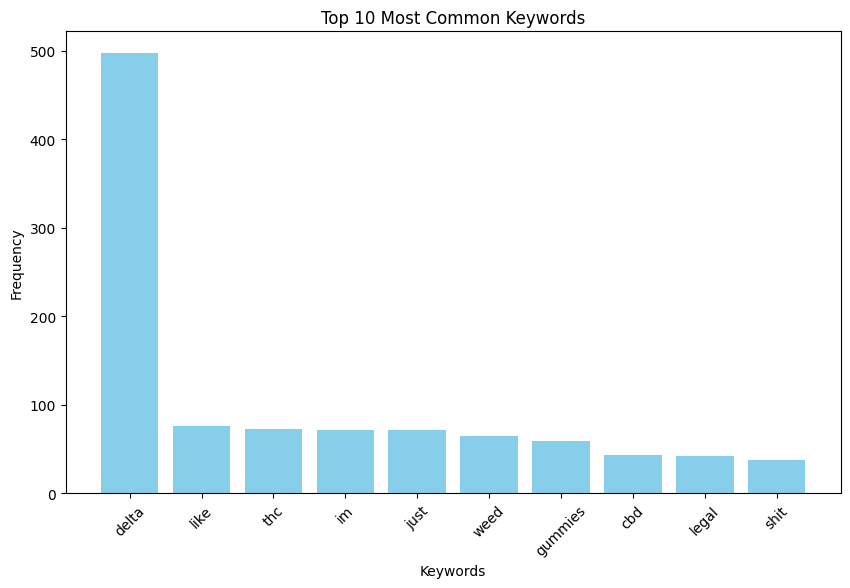

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

# Extracting all keywords into a single list
all_keywords = sum(df['keywords'].apply(lambda x: x.split(', ')), [])

# Counting the frequency of each keyword
keyword_frequency = Counter(all_keywords)

# Getting the 10 most common keywords
most_common_keywords = keyword_frequency.most_common(10)
keywords, frequencies = zip(*most_common_keywords)

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(keywords, frequencies, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Keywords')
plt.xticks(rotation=45)

output_file = os.path.join(output_full, 'keyword_frequency_graph.png')
plt.savefig(output_file, bbox_inches='tight', dpi=300)
plt.show()

In [30]:
from collections import Counter

# Extracting all keywords into a single list
all_keywords = sum(df['keywords'].apply(lambda x: x.split(', ')), [])

# Counting the frequency of each keyword
keyword_frequency = Counter(all_keywords)

# Convert the keyword frequency dictionary to a DataFrame
df_keywords = pd.DataFrame(keyword_frequency.items(), columns=['Keyword', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_keywords = df_keywords.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the first few rows of the new DataFrame
print(df_keywords.head())

output_file = os.path.join(output_full, 'keyword_frequency.csv')
df_keywords.to_csv(output_file, index=False)

  Keyword  Frequency
0   delta        497
1    like         76
2     thc         73
3      im         72
4    just         72


In [31]:
themes = {
    "Cannabis Types and Components": ["delta", "thc", "cbd"],
    "User Experience": ["high", "weed"],
    "Legality and Regulation": ["legal"],
    "General Conversation": ["like", "just", "Shit"]
}

# Initialize a counter for each theme
theme_counts = {theme: 0 for theme in themes}

# Iterate over each tweet
for index, row in df.iterrows():
    tweet_keywords = row['keywords'].split(', ')
    for theme, theme_keywords in themes.items():
        if any(keyword in tweet_keywords for keyword in theme_keywords):
            theme_counts[theme] += 1

# Convert theme_counts to a DataFrame for better visualization
df_theme_counts = pd.DataFrame(theme_counts.items(), columns=['Theme', 'Count'])

# Display the first few rows of the new DataFrame
print(df_theme_counts.head())

output_file = os.path.join(output_full, 'theme_frequency.csv')
df_theme_counts.to_csv(output_file, index=False)

                           Theme  Count
0  Cannabis Types and Components    497
1                User Experience     96
2        Legality and Regulation     42
3           General Conversation    138


In [1]:
# 4. Theme Analysis
themes = {
    "Cannabis Types and Components": ["delta", "thc", "cbd"],
    "User Experience": ["high", "weed"],
    "Legality and Regulation": ["legal"],
    "General Conversation": ["like", "just", "shit"]
}

def analyze_themes(df):
    # Initialize a counter for each theme
    theme_counts = {theme: 0 for theme in themes}
    
    # Get keywords for each tweet
    df['keywords'] = df['tweet'].apply(lambda x: [word for word, count in get_keywords(x, n=None)])
    
    # Iterate over each tweet
    for _, row in df.iterrows():
        tweet_keywords = row['keywords']
        for theme, theme_keywords in themes.items():
            if any(keyword in tweet_keywords for keyword in theme_keywords):
                theme_counts[theme] += 1
    
    # Convert theme_counts to a DataFrame for better visualization
    df_theme_counts = pd.DataFrame(theme_counts.items(), columns=['Theme', 'Count'])
    
    # Calculate percentage
    df_theme_counts['Percentage'] = df_theme_counts['Count'] / len(df) * 100
    
    return df_theme_counts

# Analyze themes for both datasets
theme_counts1 = analyze_themes(df1)
theme_counts2 = analyze_themes(df2)

NameError: name 'df1' is not defined